In [1]:
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm
import random

/var/folders/87/zv8dxhh11ml31r07v761nk340000gn/T/ipykernel_32711/1220550025.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [2]:
import torch
print("Using torch", torch.__version__)
torch.manual_seed(42) # Setting the seed

Using torch 2.4.0


In [3]:
def synthetic_data(w, b, num_examples):  #@save
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

Text(0, 0.5, '$x_2$')

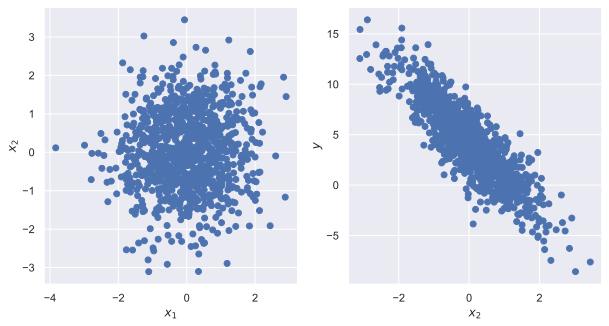

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].scatter(features[:,1],labels[:,0])
ax[1].set_xlabel('$x_2$')
ax[1].set_ylabel('$y$')
ax[0].scatter(features[:,0],features[:,1])
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.5081, -0.6185],
        [ 0.4775, -1.4889],
        [ 1.9915,  1.0238],
        [-0.0926,  0.6534],
        [ 1.8754,  1.1043],
        [-0.1418, -0.2763],
        [-0.9638, -2.5668],
        [-0.9381, -0.6385],
        [-0.9727,  0.9585],
        [-0.9971, -0.3481]]) 
 tensor([[ 5.3010],
        [10.2146],
        [ 4.7075],
        [ 1.7918],
        [ 4.2133],
        [ 4.8555],
        [11.0149],
        [ 4.5131],
        [-1.0031],
        [ 3.3920]])


In [6]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [7]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000315
epoch 2, loss 0.000100
epoch 3, loss 0.000100


In [8]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([5.2691e-05, 5.7220e-04])
b的估计误差： tensor([-0.0007])
